## POKEMON STATS ANALYSIS

Hello World.....!!

I have tried my best to keep this notebook as simple as possible and I have explained each and every function used thus even a beginner would easily understand this notebook. 
This Pokemon Dataset is a very good dataset to begin with and I myself started Analysis with the same. Hope this would help you too.

### Let's get started with some Basic Analysis

In [1]:
import pandas as pd   #importing all the important packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style

<module 'matplotlib.style' from '/opt/conda/lib/python3.6/site-packages/matplotlib/style/__init__.py'>

In [2]:
df =  pd.read_csv('../input/Pokemon.csv')  #read the csv file and save it into a variable
df.head(n=10)                    #print the first 10 rows of the table

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [3]:
df.columns = df.columns.str.upper().str.replace('_', '') #change into upper case
df.head()

,#,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
df[df['LEGENDARY']==True].head(5)  #Showing the legendary pokemons

,#,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
156,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
157,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [5]:
df = df.set_index('NAME') #change and set the index to the name attribute

### CLEANING THE DATAFRAME

In [6]:
## The index of Mega Pokemons contained extra and unneeded text. Removed all the text before "Mega"  
df.index = df.index.str.replace(".*(?=Mega)", "")
df.head(10)

,#,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False
Charmeleon,5,Fire,NaN,405,58,64,58,80,65,80,1,False
Charizard,6,Fire,Flying,534,78,84,78,109,85,100,1,False
Mega Charizard X,6,Fire,Dragon,634,78,130,111,130,85,100,1,False
Mega Charizard Y,6,Fire,Flying,634,78,104,78,159,115,100,1,False


In [7]:
df=df.drop(['#'],axis=1) #drop the columns with axis=1;axis=0 is for rows

In [8]:
print('The columns of the dataset are: ',df.columns) #show the dataframe columns
print('The shape of the dataframe is: ',df.shape)    #shape of the dataframe

The columns of the dataset are:  Index(['TYPE 1', 'TYPE 2', 'TOTAL', 'HP', 'ATTACK', 'DEFENSE', 'SP. ATK',
       'SP. DEF', 'SPEED', 'GENERATION', 'LEGENDARY'],
      dtype='object')
The shape of the dataframe is:  (800, 11)


In [9]:
#some values in TYPE2 are empty and thus they have to be filled or deleted
df['TYPE 2'].fillna(df['TYPE 1'], inplace=True) #fill NaN values in Type2 with corresponding values of Type

In [10]:
print(df.loc['Bulbasaur']) #retrieves complete row data from index with value Bulbasaur
print(df.iloc[0]) #retrieves complete row date from index 0 ; integer version of loc
print(df.ix[0]) #similar to iloc
print(df.ix['Kakuna']) #similar to loc
#loc works on labels in the index.
#iloc works on the positions in the index (so it only takes integers).
#ix usually tries to behave like loc but falls back to behaving like iloc if the label is not in the index.
#inoreder to find details about any pokemon, just specify its name

TYPE 1         Grass
TYPE 2        Poison
TOTAL            318
HP                45
ATTACK            49
DEFENSE           49
SP. ATK           65
SP. DEF           65
SPEED             45
GENERATION         1
LEGENDARY      False
Name: Bulbasaur, dtype: object
TYPE 1         Grass
TYPE 2        Poison
TOTAL            318
HP                45
ATTACK            49
DEFENSE           49
SP. ATK           65
SP. DEF           65
SPEED             45
GENERATION         1
LEGENDARY      False
Name: Bulbasaur, dtype: object
TYPE 1         Grass
TYPE 2        Poison
TOTAL            318
HP                45
ATTACK            49
DEFENSE           49
SP. ATK           65
SP. DEF           65
SPEED             45
GENERATION         1
LEGENDARY      False
Name: Bulbasaur, dtype: object
TYPE 1           Bug
TYPE 2        Poison
TOTAL            205
HP                45
ATTACK            25
DEFENSE           50
SP. ATK           25
SP. DEF           25
SPEED             35
GENERATION         1
LEGE

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
#filtering pokemons using logical operators
df[((df['TYPE 1']=='Fire') | (df['TYPE 1']=='Dragon')) & ((df['TYPE 2']=='Dragon') | (df['TYPE 2']=='Fire'))].head(3)

,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,
Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False
Charmeleon,Fire,Fire,405,58,64,58,80,65,80,1,False
Mega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False


In [12]:
print("MAx HP:",df['HP'].argmax())  #returns the pokemon with highest HP
print("Max DEFENCE:",(df['DEFENSE']).idxmax()) #similar to argmax()

MAx HP: Blissey
Max DEFENCE: Mega Steelix


In [13]:
df.sort_values('TOTAL',ascending=False).head(3)  #this arranges the pokemons in the descendng order of the Totals.
#sort_values() is used for sorting and ascending=False is making it in descending order

,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,
Mega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
Mega Mewtwo Y,Psychic,Psychic,780,106,150,70,194,120,140,1,True
Mega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [14]:
print('The unique  pokemon types are',df['TYPE 1'].unique()) #shows all the unique types in column
print('The number of unique types are',df['TYPE 1'].nunique()) #shows count of unique values 

The unique  pokemon types are ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground' 'Fairy'
 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel' 'Flying']
The number of unique types are 18


In [15]:
print(df['TYPE 1'].value_counts(), '\n' ,df['TYPE 2'].value_counts())#count different types of pokemons
df.groupby(['TYPE 1']).size()  #same as above
(df['TYPE 1']=='Bug').sum() #counts for a single value

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ghost        32
Ground       32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: TYPE 1, dtype: int64 
 Flying      99
Water       73
Psychic     71
Normal      65
Grass       58
Poison      49
Ground      48
Fighting    46
Fire        40
Fairy       38
Electric    33
Dark        30
Dragon      29
Ice         27
Steel       27
Ghost       24
Rock        23
Bug         20
Name: TYPE 2, dtype: int64


69

In [16]:
df_summary = df.describe() #summary of the pokemon dataframe
df_summary

,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


## VISUALISATIONS

##### The attack distribution for the pokemons across all the genarations

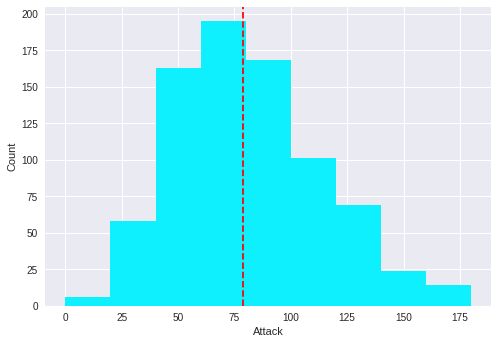

In [17]:
bins=range(0,200,20) #they act as containers
plt.hist(df["ATTACK"],bins,histtype="bar",rwidth=1.2,color='#0ff0ff') #hist() is used to plot a histogram
plt.xlabel('Attack') #set the xlabel name
plt.ylabel('Count') #set the ylabel name
plt.plot()
plt.axvline(df['ATTACK'].mean(),linestyle='dashed',color='red') #draw a vertical line showing the average Attack value
plt.show()

Above is a Histogram showing the distribution of attacks for the Pokemons. The average value is between 75-77

### Fire Vs Water

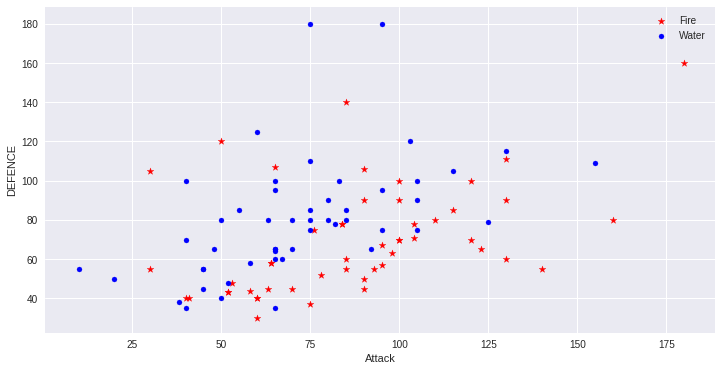

In [18]:
fire=df[(df['TYPE 1']=='Fire') | ((df['TYPE 2'])=="Fire")] #fire contains all fire pokemons
water=df[(df['TYPE 1']=='Water') | ((df['TYPE 2'])=="Water")]  #all water pokemins
plt.scatter(fire.ATTACK.head(50),fire.DEFENSE.head(50),color='R',label='Fire',marker="*",s=50) #scatter plot
plt.scatter(water.ATTACK.head(50),water.DEFENSE.head(50),color='B',label="Water",s=25)
plt.xlabel("Attack")
plt.ylabel("DEFENCE")
plt.legend()
plt.plot()
fig=plt.gcf()  #get the current figure using .gcf()
fig.set_size_inches(12,6) #set the size for the figure
plt.show()

This shows that fire type pokemons have a better attack than water type pokemons but have a lower defence than water type.

### Strongest Pokemons By Types

In [19]:
strong=df.sort_values(by='TOTAL', ascending=False) #sorting the rows in descending order
strong.drop_duplicates(subset=['TYPE 1'],keep='first') #since the rows are now sorted in descending oredr
#thus we take the first row for every new type of pokemon i.e the table will check TYPE 1 of every pokemon
#The first pokemon of that type is the strongest for that type
#so we just keep the first row

,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,
Mega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
Mega Mewtwo Y,Psychic,Psychic,780,106,150,70,194,120,140,1,True
KyogrePrimal Kyogre,Water,Water,770,100,150,90,180,160,90,3,True
GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
Arceus,Normal,Normal,720,120,120,120,120,120,120,4,True
Mega Metagross,Steel,Psychic,700,80,145,150,105,110,110,3,False
Mega Tyranitar,Rock,Dark,700,100,164,150,95,120,71,2,False
GiratinaOrigin Forme,Ghost,Dragon,680,150,120,100,120,100,90,4,True
Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True


## Distribution of various pokemon types

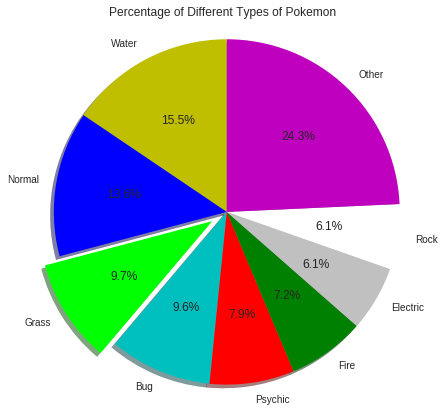

In [20]:
labels = 'Water', 'Normal', 'Grass', 'Bug', 'Psychic', 'Fire', 'Electric', 'Rock', 'Other'
sizes = [112, 98, 70, 69, 57, 52, 44, 44, 175]
colors = ['Y', 'B', '#00ff00', 'C', 'R', 'G', 'silver', 'white', 'M']
explode = (0, 0, 0.1, 0, 0, 0, 0, 0, 0)  # only "explode" the 3rd slice 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("Percentage of Different Types of Pokemon")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(7,7)
plt.show()

## All stats analysis of the pokemons

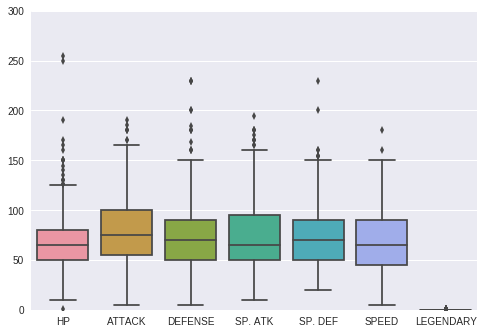

In [21]:
df2=df.drop(['GENERATION','TOTAL'],axis=1)
sns.boxplot(data=df2)
plt.ylim(0,300)  #change the scale of the plot
sns.plt.show()

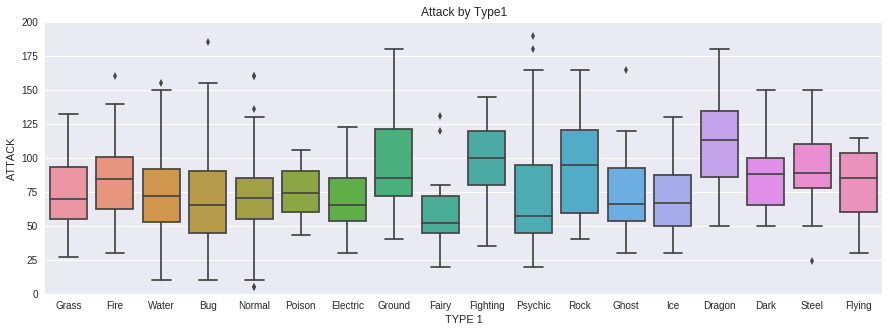

In [22]:
plt.subplots(figsize = (15,5))
plt.title('Attack by Type1')
sns.boxplot(x = "TYPE 1", y = "ATTACK",data = df)
plt.ylim(0,200)
sns.plt.show()

#### This shows that the Dragon type pokemons have an edge over the other types as they have a higher attacks compared to the other types. Also since the fire pokemons have lower range of values, but higher attacks, they can be preferred over the grass and water types for attacking.


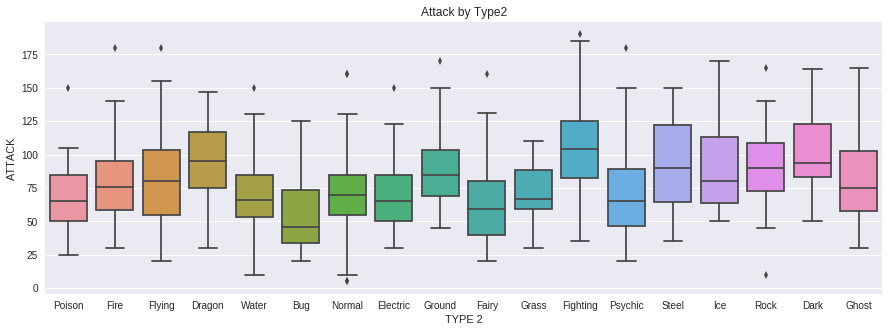

In [23]:
plt.subplots(figsize = (15,5))
plt.title('Attack by Type2')
sns.boxplot(x = "TYPE 2", y = "ATTACK",data = df)
sns.plt.show()

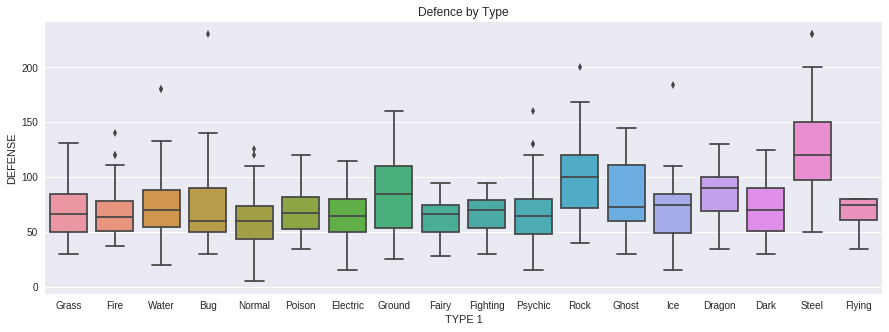

In [24]:
plt.subplots(figsize = (15,5))
plt.title('Defence by Type')
sns.boxplot(x = "TYPE 1", y = "DEFENSE",data = df)
sns.plt.show()

This shows that steel type pokemons have the highest defence but normal type pokemons have the lowest defence

### Now lets see the same stats in violinplot

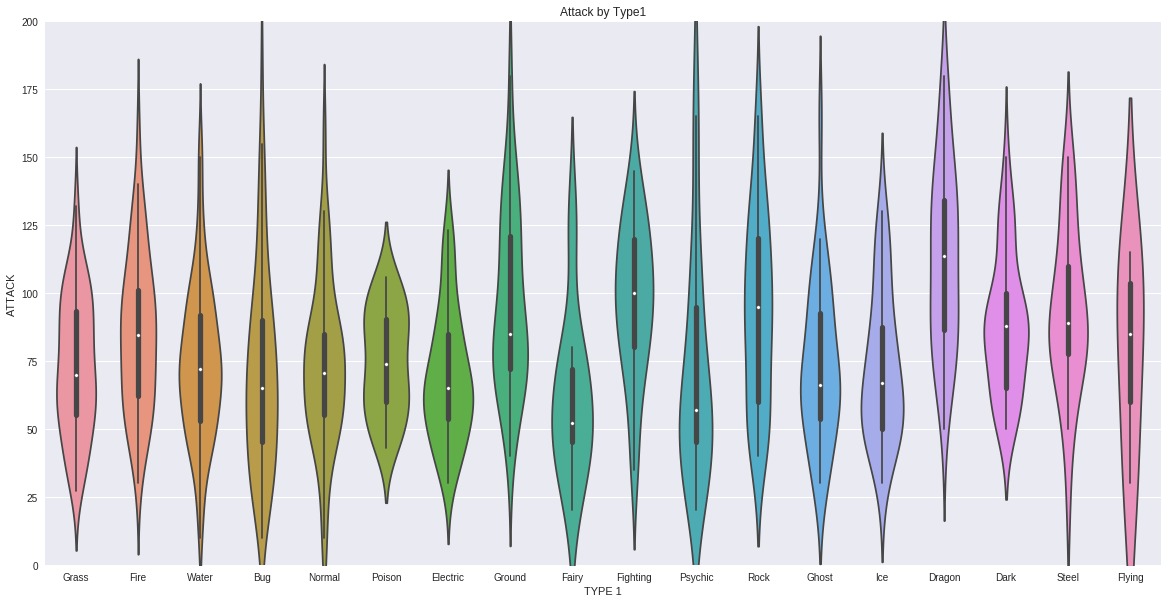

In [25]:
plt.subplots(figsize = (20,10))
plt.title('Attack by Type1')
sns.violinplot(x = "TYPE 1", y = "ATTACK",data = df)
plt.ylim(0,200)
plt.show()

What the violinplot actually does is it plots according to the density of a region. This means that the parts of the plot where the width is thicker denotes a region with higher density points whereas regions with thinner area show less densely populated points.

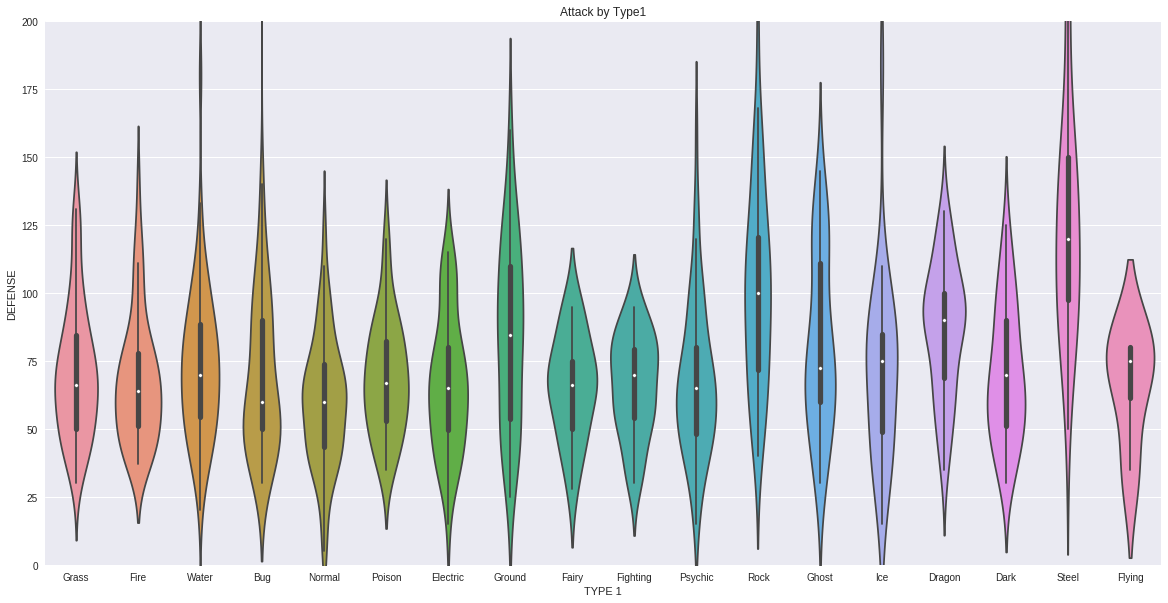

In [26]:
plt.subplots(figsize = (20,10))
plt.title('Attack by Type1')
sns.violinplot(x = "TYPE 1", y = "DEFENSE",data = df)
plt.ylim(0,200)
sns.plt.show()

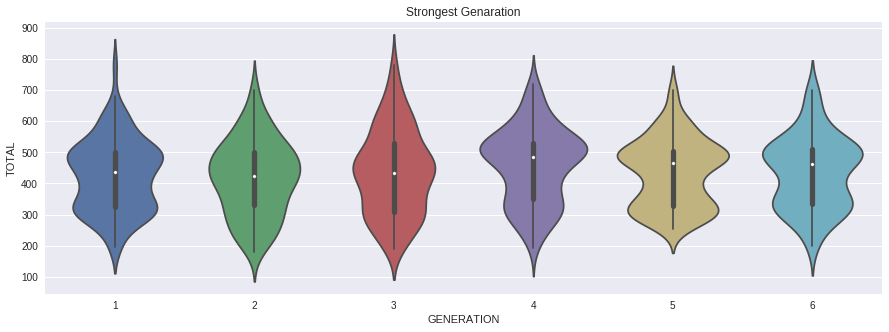

In [27]:
plt.subplots(figsize = (15,5))
plt.title('Strongest Genaration')
sns.violinplot(x = "GENERATION", y = "TOTAL",data = df)
sns.plt.show()

This shows that generation 3  has the better pokemons

### Strong Pokemons By Type

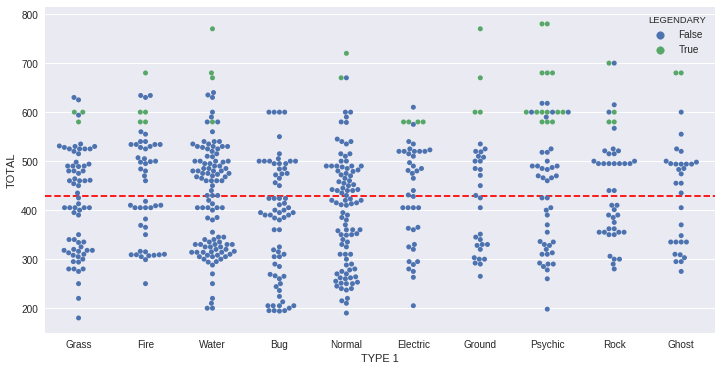

In [28]:
plt.figure(figsize=(12,6))
top_types=df['TYPE 1'].value_counts()[:10] #take the top 10 Types
df1=df[df['TYPE 1'].isin(top_types.index)] #take the pokemons of the type with highest numbers, top 10
sns.swarmplot(x='TYPE 1',y='TOTAL',data=df1,hue='LEGENDARY') # this plot shows the points belonging to individual pokemons
# It is distributed by Type
plt.axhline(df1['TOTAL'].mean(),color='red',linestyle='dashed')
plt.show()

 Legendary Pokemons are mostly taking the top spots in the Strongest Pokemons


### Finding any Correlation between the attributes

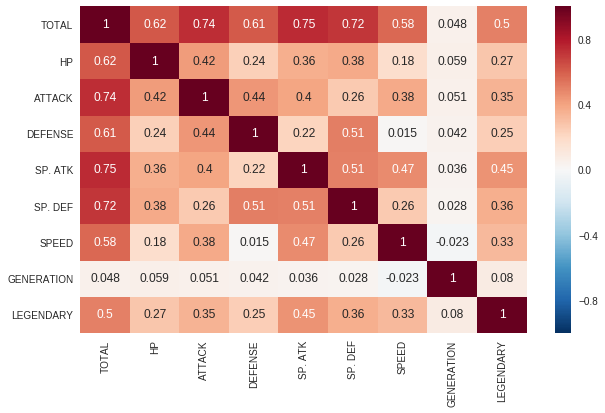

In [29]:
plt.figure(figsize=(10,6)) #manage the size of the plot
sns.heatmap(df.corr(),annot=True) #df.corr() makes a correlation matrix and sns.heatmap is used to show the correlations heatmap
plt.show()

From the heatmap it can be seen that there is not much correlation between the attributes of the pokemons. The highest we can see is the correlation between Sp.Atk and the Total 

### Number of Pokemons by Type And Generation

### Type 1

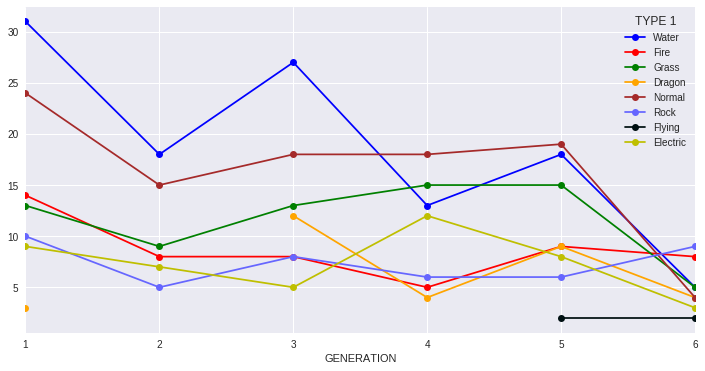

In [30]:
a=df.groupby(['GENERATION','TYPE 1']).count().reset_index()
a=a[['GENERATION','TYPE 1','TOTAL']]
a=a.pivot('GENERATION','TYPE 1','TOTAL')
a[['Water','Fire','Grass','Dragon','Normal','Rock','Flying','Electric']].plot(color=['b','r','g','#FFA500','brown','#6666ff','#001012','y'],marker='o')
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

We can see that water pokemons had the highest numbers in the 1st Generation. However the number has decreased with passing generations. Similarly Grass type pokemons showed an increase in their numbers till generation 5.

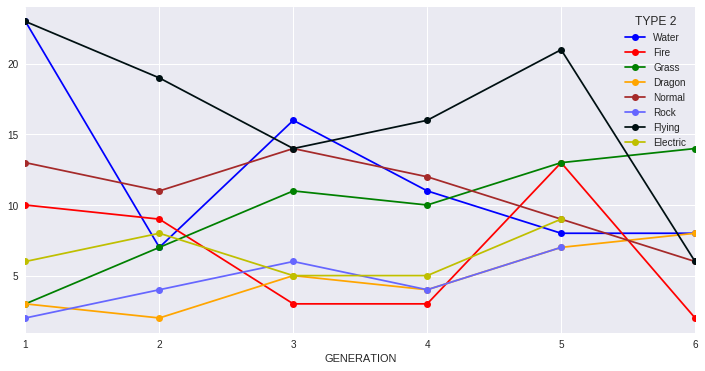

In [31]:
a=df.groupby(['GENERATION','TYPE 2']).count().reset_index()
a=a[['GENERATION','TYPE 2','TOTAL']]
a=a.pivot('GENERATION','TYPE 2','TOTAL')
a[['Water','Fire','Grass','Dragon','Normal','Rock','Flying','Electric']].plot(color=['b','r','g','#FFA500','brown','#6666ff','#001012','y'],marker='o')
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

This graph shows that the number of Type2 Grass Pokemons has been steadily increasing. The same is the case for the Dragon Type Pokemons. For other Types the trends are somewhat uneven.

Thank You All for reading this notebook. Hope You All Liked It!!!!!!